In [1]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('/content/Song.csv')

# Afficher les premières lignes du DataFrame
print(df.head())  # Montre un aperçu des 5 premières lignes du dataset

# Résumé statistique pour les colonnes 'Sales' et 'Streams'
print(df[['Sales', 'Streams']].describe())  # Affiche des statistiques comme la moyenne, min, max, etc.

# Corrélation entre 'Sales' et 'Streams'
print(df[['Sales', 'Streams']].corr())  # Calcule la corrélation entre les deux colonnes

                    Artist                              Title  Year   Sales  \
0  Bill Haley & his Comets              Rock Around the Clock  1955  36.503   
1              Celine Dion                My Heart Will Go On  1998  35.405   
2          Sinead O'Connor               Nothing Compares 2 U  1990  35.135   
3              The Beatles                           Hey Jude  1968  34.442   
4              Bryan Adams  (Everything I Do) I Do it For You  1991  34.367   

   Streams  Downloads  Radio Plays  Rating  
0   19.961      7.458        5.663   0.760  
1   12.636      8.944       23.701   3.610  
2   14.582     10.242       23.747   2.733  
3   25.545     16.390       16.541   1.510  
4   16.523     12.368       23.194   3.121  
             Sales      Streams
count  4850.000000  4850.000000
mean      8.154870     4.628823
std       4.555715     3.273776
min       4.149000     0.000000
25%       5.069250     2.351250
50%       6.438000     4.200000
75%       9.784000     6.307000

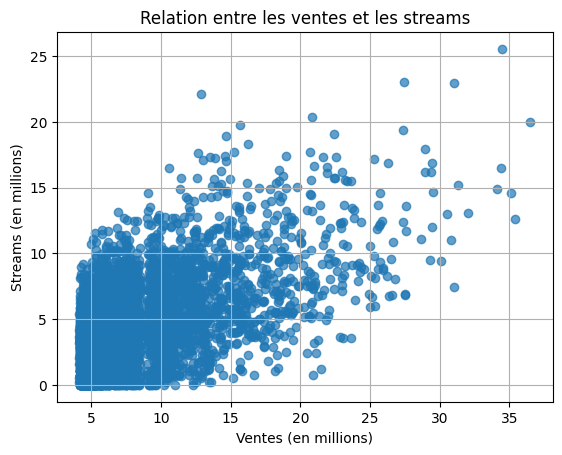

In [2]:
import matplotlib.pyplot as plt

# Scatter plot pour visualiser la relation
plt.scatter(df['Sales'], df['Streams'], alpha=0.7)
plt.title("Relation entre les ventes et les streams")
plt.xlabel("Ventes (en millions)")
plt.ylabel("Streams (en millions)")
plt.grid()
plt.show()

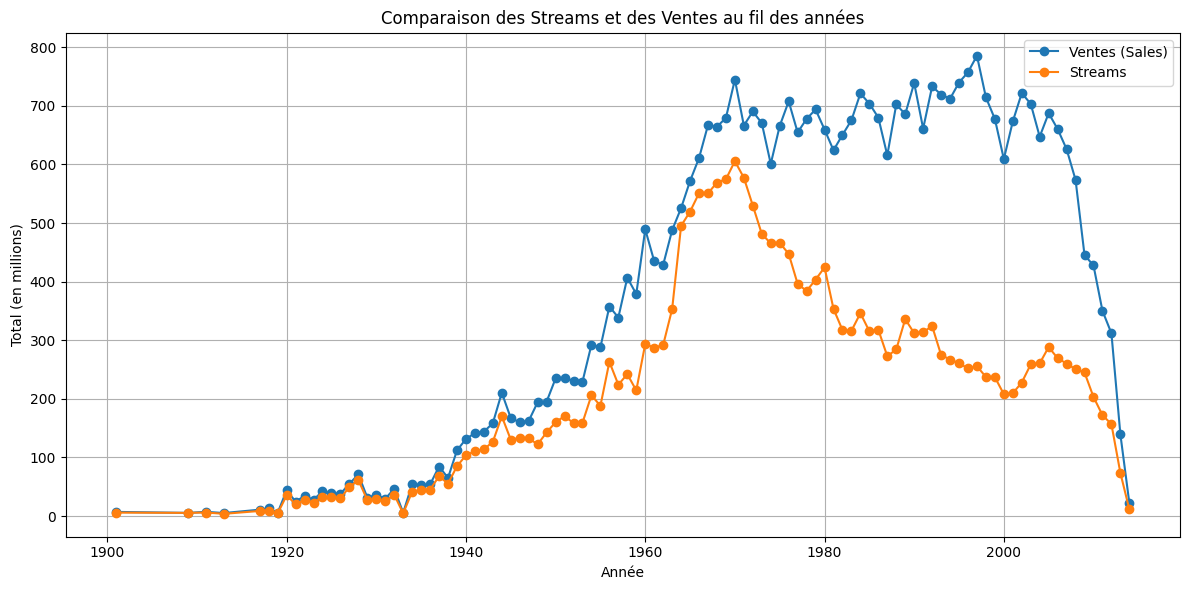

In [3]:
df.rename(columns={'Year': 'Annee'}, inplace=True)

# Agréger les données par année pour les streams et les ventes
time_data = df.groupby('Annee')[['Sales', 'Streams']].sum()

# Créer un graphique comparatif
plt.figure(figsize=(12, 6))

# Ventes sur le temps
plt.plot(time_data.index, time_data['Sales'], label="Ventes (Sales)", marker='o')

# Streams sur le temps
plt.plot(time_data.index, time_data['Streams'], label="Streams", marker='o')

# Ajouter des titres et des légendes
plt.title("Comparaison des Streams et des Ventes au fil des années")
plt.xlabel("Année")
plt.ylabel("Total (en millions)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()

In [4]:
# Lire les fichiers CSV dans des DataFrames
df_revenue = pd.read_csv('/content/evolution_chiffre_affaires.csv')
df_volume = pd.read_csv('/content/evolution_volume_conso.csv')
df_comparison = pd.read_csv('/content/comparaison_marche_2018.csv')

# Afficher les premières lignes de chaque fichier pour vérification
print("Évolution du chiffre d'affaires:")
print(df_revenue.head())

print("\nÉvolution du volume de consommation:")
print(df_volume.head())

print("\nComparaison des marchés en 2018:")

print(df_comparison.head())

Évolution du chiffre d'affaires:
   Year  Téléchargement d'albums (M€)  Téléchargement de titres (M€)  \
0  2007                          16.1                           12.2   
1  2008                          17.9                           22.8   
2  2009                          34.1                           27.5   
3  2010                          46.8                           42.1   
4  2011                          57.7                           45.7   

   Marché physique (M€)  Écoute en flux (M€)  
0                1144.4                  NaN  
1                 948.1                  NaN  
2                 857.4                  NaN  
3                 711.2                  NaN  
4                 668.1                  NaN  

Évolution du volume de consommation:
   Year  Téléchargement d'albums (milliers)  \
0  2007                                2267   
1  2008                                3419   
2  2009                                5243   
3  2010                   

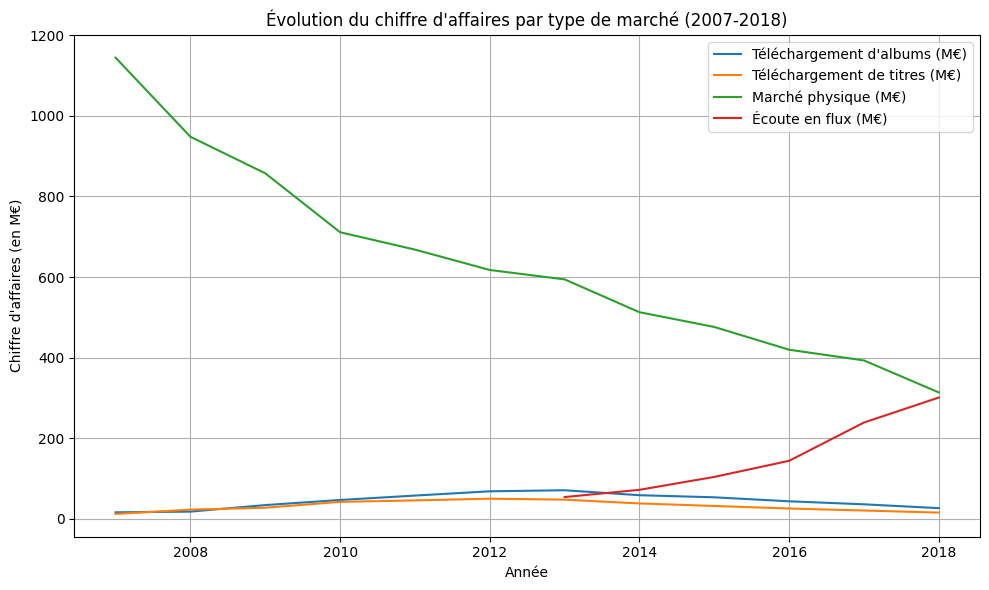

In [5]:
df_revenue.rename(columns={'Unnamed: 0': 'Marché'}, inplace=True)
df_volume.rename(columns={'Unnamed: 0': 'Marché'}, inplace=True)
df_comparison.rename(columns={'Unnamed: 0': 'Marché'}, inplace=True)
df_revenue.rename(columns={'Year': 'Annee'}, inplace=True)
df_volume.rename(columns={'Year': 'Annee'}, inplace=True)
df_comparison.rename(columns={'Year': 'Annee'}, inplace=True)

# Graphique de l'évolution du chiffre d'affaires
plt.figure(figsize=(10, 6))
for column in df_revenue.columns[1:]:
    plt.plot(df_revenue["Annee"], df_revenue[column], label=column)

plt.title("Évolution du chiffre d'affaires par type de marché (2007-2018)")
plt.xlabel("Année")
plt.ylabel("Chiffre d'affaires (en M€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

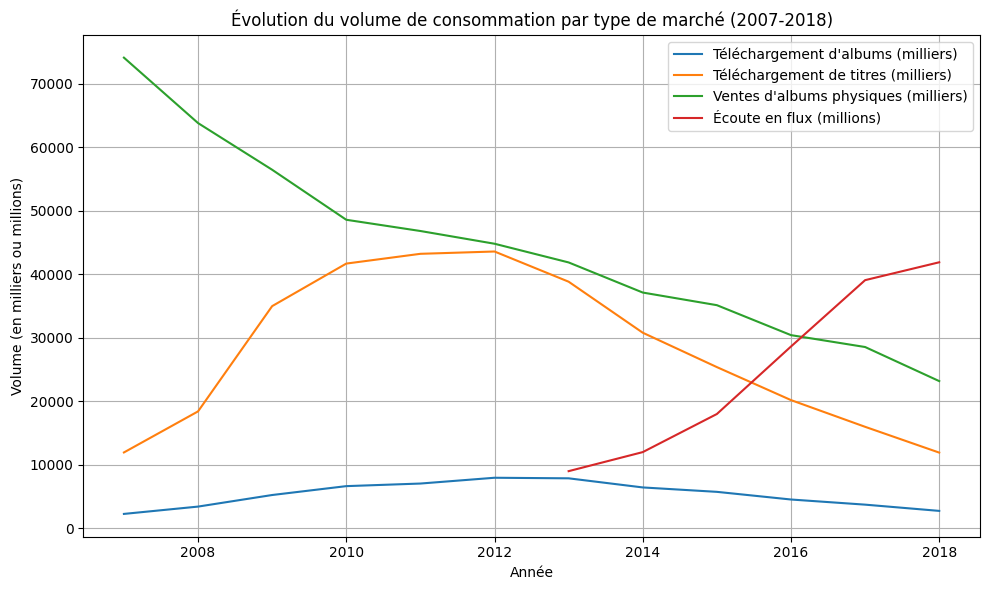

In [6]:
# Visualisation des volumes de consommation
plt.figure(figsize=(10, 6))
for column in df_volume.columns[1:]:  # Ignorer la colonne 'Annee'
    plt.plot(df_volume["Annee"], df_volume[column], label=column)

plt.title("Évolution du volume de consommation par type de marché (2007-2018)")
plt.xlabel("Année")
plt.ylabel("Volume (en milliers ou millions)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

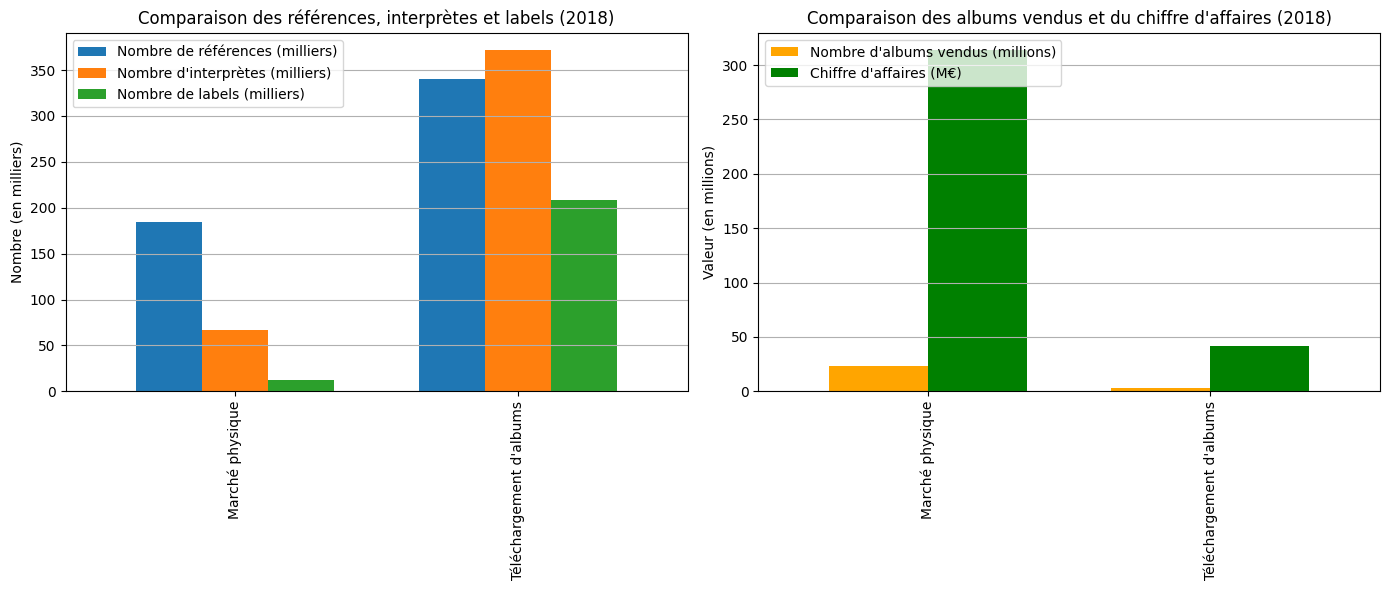

In [7]:
# Visualisation de la comparaison des marchés en 2018
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


# Graphique 1 : Comparaison des nombres de références, interprètes, et labels
df_comparison[["Nombre de références (milliers)",
               "Nombre d'interprètes (milliers)",
               "Nombre de labels (milliers)"]].plot(kind='bar', ax=ax[0], width=0.7)
ax[0].set_title("Comparaison des références, interprètes et labels (2018)")
ax[0].set_xticks(range(len(df_comparison["Marché"])))
ax[0].set_xticklabels(df_comparison["Marché"])
ax[0].set_ylabel("Nombre (en milliers)")
ax[0].legend(loc="upper left")
ax[0].grid(axis='y')

# Graphique 2 : Comparaison des albums vendus et du chiffre d'affaires
df_comparison[["Nombre d'albums vendus (millions)",
               "Chiffre d'affaires (M€)"]].plot(kind='bar', ax=ax[1], color=['orange', 'green'], width=0.7)
ax[1].set_title("Comparaison des albums vendus et du chiffre d'affaires (2018)")
ax[1].set_xticks(range(len(df_comparison["Marché"])))
ax[1].set_xticklabels(df_comparison["Marché"])
ax[1].set_ylabel("Valeur (en millions)")
ax[1].legend(loc="upper left")
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [8]:
pip install tableauhyperapi

In [9]:
from tableauhyperapi import HyperProcess, Connection, Telemetry
import os

# Liste des fichiers .hyper présents dans /content
input_hyper_files = [file for file in os.listdir("/content") if file.endswith(".hyper")]
output_csv_folder = "/content"

def export_hyper_to_csv(hyper_file, output_folder):
    try:
        with HyperProcess(telemetry=Telemetry.SEND_USAGE_DATA_TO_TABLEAU) as hyper:
            with Connection(endpoint=hyper.endpoint, database=f"/content/{hyper_file}") as connection:
                # Obtenir les tables dans le schéma "Extract"
                schema_name = "Extract"
                tables = connection.catalog.get_table_names(schema=schema_name)

                if not tables:
                    print(f"⚠️ Aucune table trouvée dans le schéma '{schema_name}' de {hyper_file}")
                    return

                for table in tables:
                    # Construire le chemin de sortie pour le fichier CSV sans "Extract" dans le nom
                    output_csv_file = f"{output_folder}/{os.path.splitext(hyper_file)[0]}.csv"
                    print(f"Exporting table {table} from {hyper_file} to {output_csv_file}")

                    # Exporter la table en CSV (chemin entre guillemets simples)
                    connection.execute_command(
                        f"COPY {table} TO '{output_csv_file}' WITH (FORMAT CSV, HEADER)"
                    )
                    print(f"✅ Fichier généré : {output_csv_file}")
    except Exception as e:
        print(f"❌ Erreur lors de la conversion du fichier {hyper_file} : {e}")

# Traiter chaque fichier Hyper dans /content
for hyper_file in input_hyper_files:
    print(f"Traitement du fichier {hyper_file}...")
    export_hyper_to_csv(hyper_file, output_csv_folder)

print("Conversion terminée. Les fichiers CSV sont disponibles dans /content.")

Traitement du fichier music_sales_in_us.hyper...
Exporting table "Extract"."Extract" from music_sales_in_us.hyper to /content/music_sales_in_us.csv
✅ Fichier généré : /content/music_sales_in_us.csv
Traitement du fichier 2021 Data.hyper...
Exporting table "Extract"."Extract" from 2021 Data.hyper to /content/2021 Data.csv
✅ Fichier généré : /content/2021 Data.csv
Conversion terminée. Les fichiers CSV sont disponibles dans /content.


# Nouvelle section

In [10]:
# Charger le fichier CSV
df_2021 = pd.read_csv('/content/2021 Data.csv')

# Afficher les premières lignes du DataFrame
print(df_2021.head())
print(df_2021.describe())

  Format Metric  Pivot Field Names  Pivot Field Values
0     CD  Units               1973                 NaN
1     CD  Units               1974                 NaN
2     CD  Units               1975                 NaN
3     CD  Units               1976                 NaN
4     CD  Units               1977                 NaN
       Pivot Field Names  Pivot Field Values
count        3366.000000         1434.000000
mean         1998.000000          907.912204
std            14.721788         2571.175870
min          1973.000000           -9.100000
25%          1985.000000            6.425000
50%          1998.000000           94.400000
75%          2011.000000          559.175000
max          2023.000000        23440.300000


In [11]:
# Charger le fichier CSV
df_revenues = pd.read_csv('/content/music_sales_in_us.csv')

# Afficher les premières lignes du DataFrame
print(df_revenues.head())
print(df_revenues.describe())

  Metric ﻿Format (group)  Year  Value (Actual)  Pivot Field Names  \
0  Units       8 - Track  1973            91.0          -0.224396   
1  Units       8 - Track  1973            91.0          -0.673196   
2  Units       8 - Track  1973            91.0          -1.122000   
3  Units       8 - Track  1973            91.0          -1.570800   
4  Units       8 - Track  1973            91.0           0.224404   

   Pivot Field Values  
0           93.215824  
1           92.073059  
2           91.282240  
3           91.000000  
4           94.484196  
              Year  Value (Actual)  Pivot Field Names  Pivot Field Values
count  9024.000000     4608.000000        9024.000000         5354.000000
mean   1996.000000     1832.507917           0.000002         1558.039770
std      13.565412     3301.267285           1.028387         3115.723908
min    1973.000000        0.100000          -1.570800            0.000000
25%    1984.000000       96.367500          -0.785397           17.9758

In [12]:
# Afficher les noms de colonnes pour vérifier les anomalies
print("Colonnes disponibles dans df_revenues :")
print(df_revenues.columns)

# Supprimer les espaces ou caractères invisibles autour des noms de colonnes
df_revenues.columns = df_revenues.columns.str.strip()

# Renommer la colonne incorrecte si nécessaire
df_revenues.rename(columns={"﻿Format (group)": "Format (group)"}, inplace=True)

# Vérification après correction
print("Colonnes corrigées :")
print(df_revenues.columns)

# Afficher les valeurs uniques de la colonne 'Format (group)'
print(df_revenues['Format (group)'].unique())

Colonnes disponibles dans df_revenues :
Index(['Metric', '﻿Format (group)', 'Year', 'Value (Actual)',
       'Pivot Field Names', 'Pivot Field Values'],
      dtype='object')
Colonnes corrigées :
Index(['Metric', 'Format (group)', 'Year', 'Value (Actual)',
       'Pivot Field Names', 'Pivot Field Values'],
      dtype='object')
['8 - Track' 'Cassette' 'CD/DVD' 'Download' 'Other' 'Streaming' 'Vinyl'
 'Z']


In [13]:
import pandas as pd
import plotly.express as px

# Charger le fichier CSV
file_path = '/content/Revenue Chart.csv'
data = pd.read_csv(file_path, delimiter=';')

data.rename(columns={'Year': 'Annee'}, inplace=True)

# Sélectionner les colonnes pertinentes
relevant_columns = ['Annee', 'Format', 'Value (For Charting)', 'Format Value # (Billion)', 'Format Value # (Million)']
data_subset = data[relevant_columns].copy()

# Convertir les colonnes "Billion" et "Million" en valeurs numériques
data_subset['Value (Billion)'] = (
    data_subset['Format Value # (Billion)']
    .str.replace(r'[^\d.,]', '', regex=True)
    .str.replace(',', '.')
    .astype(float, errors='ignore')
)
data_subset['Value (Million)'] = (
    data_subset['Format Value # (Million)']
    .str.replace(r'[^\d.,]', '', regex=True)
    .str.replace(',', '.')
    .astype(float, errors='ignore')
)

# Convertir les milliards en millions
data_subset['Value (Billion)'] = data_subset['Value (Billion)'] * 1000  # 1 milliard = 1000 millions

# Unifier les valeurs : utiliser les milliards ou les millions si disponibles
data_subset['Value (Unified)'] = data_subset['Value (Billion)'].fillna(0) + data_subset['Value (Million)'].fillna(0)

# Regrouper par année et format pour préparer le graphique empilé
stacked_data = data_subset.groupby(['Annee', 'Format'])['Value (Unified)'].sum().unstack(fill_value=0)

# Définir l'ordre des formats
format_order = [
    'LP/EP', 'Vinyl Single', '8 - Track', 'Cassette', 'Cassette Single',
    'Other Tapes', 'Other Physical', 'CD', 'CD Single', 'SACD', 'DVD Audio',
    'Music Video (Physical)', 'Download Album', 'Download Single',
    'Ringtones & Ringbacks', 'Download Music Video', 'Other Digital', 'Kiosk',
    'Paid Subscription', 'On-Demand Streaming (Ad-Supported)',
    'Other Ad-Supported Streaming', 'SoundExchange Distributions',
    'Limited Tier Paid Subscription', 'Synchronization'
]

# Inverser l'ordre des formats pour que les nouveaux apparaissent en bas
reversed_format_order = format_order[::-1]

# Réindexer les données empilées avec l'ordre inversé
stacked_data_reversed = stacked_data.reindex(columns=reversed_format_order, fill_value=0)

# Définir les couleurs par logique de technologie
color_mapping = {
    'LP/EP': '#1f77b4',
    'Vinyl Single': '#2a88c8',
    '8 - Track': '#3b9fd0',
    'Cassette': '#4db6d8',
    'Cassette Single': '#60cce0',
    'Other Tapes': '#74e3e8',
    'Other Physical': '#88fafa',
    'CD': '#ff7f0e',
    'CD Single': '#ff8a32',
    'SACD': '#ff9d56',
    'DVD Audio': '#ffb17a',
    'Music Video (Physical)': '#ffc59e',
    'Download Album': '#2ca02c',
    'Download Single': '#39ac39',
    'Ringtones & Ringbacks': '#46b846',
    'Download Music Video': '#53c553',
    'Other Digital': '#60d160',
    'Kiosk': '#6fde6f',
    'Paid Subscription': '#d62728',
    'On-Demand Streaming (Ad-Supported)': '#e23a3a',
    'Other Ad-Supported Streaming': '#ed4e4e',
    'SoundExchange Distributions': '#f86262',
    'Limited Tier Paid Subscription': '#ff7676',
    'Synchronization': '#9467bd'
}

# Assigner les couleurs en fonction de l'ordre inversé
reversed_colors = [color_mapping[fmt] for fmt in reversed_format_order if fmt in stacked_data_reversed.columns]

# Dictionnaire des traductions
translation_mapping = {
    'LP/EP': 'Disques vinyles / EP',
    'Vinyl Single': 'Singles vinyles',
    '8 - Track': '8 pistes',
    'Cassette': 'Cassettes',
    'Cassette Single': 'Singles cassettes',
    'Other Tapes': 'Autres bandes',
    'Other Physical': 'Autres supports physiques',
    'CD': 'CD',
    'CD Single': 'Singles CD',
    'SACD': 'SACD',
    'DVD Audio': 'DVD audio',
    'Music Video (Physical)': 'Vidéos musicales (physiques)',
    'Download Album': 'Albums téléchargés',
    'Download Single': 'Singles téléchargés',
    'Ringtones & Ringbacks': 'Sonneries et tonalités',
    'Download Music Video': 'Vidéos musicales téléchargées',
    'Other Digital': 'Autres numériques',
    'Kiosk': 'Kiosque',
    'Paid Subscription': 'Abonnements payants',
    'On-Demand Streaming (Ad-Supported)': 'Streaming à la demande (avec publicité)',
    'Other Ad-Supported Streaming': 'Autres streaming avec publicité',
    'SoundExchange Distributions': 'Distributions SoundExchange',
    'Limited Tier Paid Subscription': 'Abonnements payants limités',
    'Synchronization': 'Synchronisation'
}

# Appliquer les traductions aux colonnes
stacked_data_reversed.columns = [translation_mapping[col] for col in stacked_data_reversed.columns]

# Réorganiser les données pour Plotly (format long)
plotly_data = stacked_data_reversed.reset_index().melt(
    id_vars='Annee',
    var_name='Format',
    value_name='Revenus (millions USD)'
)

# Créer le graphique interactif avec Plotly
fig = px.bar(
    plotly_data,
    x='Annee',
    y='Revenus (millions USD)',
    color='Format',
    title='Revenus de la musique enregistrée par format (en millions)',
    labels={'Annee': 'Annee', 'Revenus (millions)': 'Revenus (millions)', 'Format': 'Format'},
    color_discrete_sequence=reversed_colors  # Utiliser les couleurs définies
)

# Mettre à jour l'apparence
fig.update_layout(
    xaxis_title='Annee',
    yaxis_title='Revenus (millions USD)',
    legend_title='Format',
    legend=dict(
        orientation='v',
        x=1.05,
        y=1,
        traceorder='reversed'
    )
)

fig.show()

In [14]:
# Regrouper les formats dans les 6 sous-catégories principales
category_mapping = {
    'LP/EP': 'Vinyles', 'Vinyl Single': 'Vinyles',
    '8 - Track': 'Cassettes', 'Cassette': 'Cassettes',
    'Cassette Single': 'Cassettes', 'Other Tapes': 'Cassettes',
    'CD': 'Disques CD', 'CD Single': 'Disques CD',
    'SACD': 'Disques CD', 'DVD Audio': 'Disques CD',
    'Music Video (Physical)': 'Disques CD',

    'Download Album': 'Téléchargements', 'Download Single': 'Téléchargements',
    'Ringtones & Ringbacks': 'Sonneries', 'Download Music Video': 'Téléchargements',
    'Other Digital': 'Téléchargements', 'Kiosk': 'Téléchargements',
    'Paid Subscription': 'Streaming', 'On-Demand Streaming (Ad-Supported)': 'Streaming',
    'Other Ad-Supported Streaming': 'Streaming', 'SoundExchange Distributions': 'Streaming',
    'Limited Tier Paid Subscription': 'Streaming',
    'Synchronization': 'Streaming'
}

# Définir un color mapping cohérent pour les 6 catégories principales
color_mapping = {
    'Vinyles': '#1f77b4', 'Cassettes': '#2a88c8', 'Disques CD': '#4db6d8',
    'Téléchargements': '#d62728', 'Sonneries': '#e23a3a', 'Streaming': '#ed4e4e'
}

# Regrouper les formats dans les 6 sous-catégories principales
data_subset['Format'] = data_subset['Format'].map(category_mapping)

# Regrouper les données par année et sous-catégorie pour réduire à 6 lignes
reduced_data = data_subset.groupby(['Annee', 'Format'])['Value (Unified)'].sum().reset_index()

# Ordonner les sous-catégories pour inverser leur empilement (commence par Streaming)
reversed_category_order = ['Streaming', 'Sonneries', 'Téléchargements', 'Disques CD', 'Cassettes', 'Vinyles']
reduced_data['Format'] = pd.Categorical(
    reduced_data['Format'], categories=reversed_category_order, ordered=True
)

# Vérifier et nettoyer les données pour éliminer les catégories mal définies ou manquantes
filtered_data_clean = reduced_data[reduced_data['Format'].notna()].copy()

# Assurer que toutes les valeurs appartiennent à l'ordre correct
filtered_data_clean = filtered_data_clean[
    filtered_data_clean['Format'].isin(reversed_category_order)
]

# Reclasser les catégories pour correspondre à l'ordre souhaité
filtered_data_clean['Format'] = pd.Categorical(
    filtered_data_clean['Format'], categories=reversed_category_order, ordered=True
)

# Créer le graphique corrigé
fig = px.bar(
    filtered_data_clean.sort_values(by='Format'),
    x='Annee',
    y='Value (Unified)',
    color='Format',
    title='Revenus de la musique enregistrée par format (en millions USD)',
    labels={'Annee': 'Annee', 'Value (Unified)': 'Revenus (millions USD)', 'Format': 'Catégorie'},
    color_discrete_map=color_mapping  # Utiliser les couleurs définies
)

# Mettre à jour l'apparence pour un empilement inversé
fig.update_layout(
    xaxis_title='Annee',
    yaxis_title='Revenus (millions USD)',
    legend_title='Catégorie',
    legend=dict(
        orientation='v',
        x=1.05,
        y=1,
        traceorder='reversed'  # Maintenir un ordre logique
    ),
    barmode='stack'  # Empiler les barres correctement
)

fig.show()

In [ ]:
# Ajouter une colonne pour regrouper les années par décennie
data_cleaned['Decennie'] = (data_cleaned['Annee'] // 10) * 10

# Regrouper les données par décennie et format
data_by_decade = data_cleaned.groupby(['Decennie', 'Format'], as_index=False)['Value'].sum()

# Créer un graphique par décennie avec Plotly
fig = px.bar(
    data_by_decade,
    x='Decennie',
    y='Value',
    color='Format',
    title='Répartition des revenus de la musique enregistrée par décennie (en millions USD)',
    labels={'Decennie': 'Décennie', 'Value': 'Revenus (millions USD)', 'Format': 'Catégorie'},
    color_discrete_map=color_mapping,  # Utiliser le mapping des couleurs
    barmode='stack'
)

fig.show()

In [42]:

# Charger le fichier avec un séparateur correct (point-virgule)
data_corrected = pd.read_csv(file_path, sep=';')


# Sélectionner les colonnes pertinentes et renommer pour simplifier
data_cleaned = data_corrected[['Year', 'Format', 'Value (For Charting)']].copy()
data_cleaned.rename(columns={'Year': 'Annee', 'Format': 'Format', 'Value (For Charting)': 'Value'}, inplace=True)

# Remplacer les virgules par des points et convertir la colonne "Value" en numérique
data_cleaned['Value'] = data_cleaned['Value'].str.replace(',', '.').astype(float)





# Appliquer le mapping des catégories
category_mapping = {
    'LP/EP': 'Vinyles', 'Vinyl Single': 'Vinyles',
    '8 - Track': 'Cassettes', 'Cassette': 'Cassettes',
    'Cassette Single': 'Cassettes', 'Other Tapes': 'Cassettes',
    'CD': 'Disques CD', 'CD Single': 'Disques CD',
    'SACD': 'Disques CD', 'DVD Audio': 'Disques CD',
    'Music Video (Physical)': 'Disques CD',
    'Download Album': 'Téléchargements', 'Download Single': 'Téléchargements',
    'Ringtones & Ringbacks': 'Sonneries', 'Download Music Video': 'Téléchargements',
    'Other Digital': 'Téléchargements', 'Kiosk': 'Téléchargements',
    'Paid Subscription': 'Streaming', 'On-Demand Streaming (Ad-Supported)': 'Streaming',
    'Other Ad-Supported Streaming': 'Streaming', 'SoundExchange Distributions': 'Streaming',
    'Limited Tier Paid Subscription': 'Streaming',
    'Synchronization': 'Streaming'
}

data_cleaned['Format'] = data_cleaned['Format'].map(category_mapping)

# Filtrer les données pour garder uniquement les formats définis
data_cleaned = data_cleaned[data_cleaned['Format'].notna()]

# Regrouper les données par format uniquement
data_by_format = data_cleaned.groupby('Format', as_index=False)['Value'].sum()

# Définir le color mapping cohérent pour les 6 catégories principales
color_mapping = {
    'Vinyles': '#1f77b4', 'Cassettes': '#2a88c8', 'Disques CD': '#4db6d8',
    'Téléchargements': '#d62728', 'Sonneries': '#e23a3a', 'Streaming': '#ed4e4e'
}

# Créer un treemap avec le color mapping respecté
fig = px.treemap(
    data_by_format,
    path=['Format'],
    values='Value',
    title='Répartition des revenus de la musique enregistrée par format (en millions USD)',
    color='Format',
    color_discrete_map=color_mapping
)

fig.show()

In [44]:
# Ajouter une colonne pour les décennies
data_cleaned['Decennie'] = (data_cleaned['Annee'] // 10) * 10

# Regrouper les données par décennie et format
data_by_decade = data_cleaned.groupby(['Decennie', 'Format'], as_index=False)['Value'].sum()

# Créer un treemap par décennie
fig = px.treemap(
    data_by_decade,
    path=['Decennie', 'Format'],
    values='Value',
    title='Répartition des revenus de la musique enregistrée par format et par décennie (en millions USD)',
    color='Format',
    color_discrete_map=color_mapping
)

fig.show()
